In [7]:
import numpy as np
from spline import Spline
import math
from scipy import optimize
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

In [8]:
FOV_range = 10
scale_resolution = .1
x = np.arange(0, FOV_range*2, scale_resolution)
y = np.arange(0, FOV_range*2, scale_resolution)
x0 = 9.99
y0 = 0
sigx = 1
sigy = 1
Xg, Yg = np.meshgrid(x, y)
SiP = [0, 4]

In [9]:
def gauss_function_2d(x, x0, y0, sigma_x, sigma_y):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    A = (1. / (2 * np.pi*sigma_x*sigma_y))
    return A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))

In [10]:
def object_function(x, goalPosition=(20,20)):
    '''Calculate the difference between the goal position and the current
    position of the distance'''
    res = math.dist((x[-2], x[-1]), goalPosition)
    # print(res)
    return res

# GPnlc = NonlinearConstraint(object_function, 0, np.inf)

In [11]:
def obj_crete(x):
    tmp = []
    # print(len(x))
    arr = np.zeros(int(len(x)/2))
    # print(arr)
    for i in range(0, len(x), 2):
        # tmp.append(gauss_function_2d([x[i], x[i+1]], SiP[0], abs(SiP[1]-(i/2)), 1.05**(i/2), 1.05**(i/2)))
        tmp.append(gauss_function_2d([x[i], x[i+1]], abs(SiP[0]-(i/2)),SiP[1], 1.05**(i/2), 1.05**(i/2)))
    arr_tmp = np.array(tmp)
    arr = arr_tmp + arr
    tmp = []
    # print(arr)
    # res = list(arr)
    # arr = arr/20
    return arr.tolist()

P_nlc = NonlinearConstraint(obj_crete, 0.0, 0.01)

In [12]:
def con_cltr_pnt(x):
    con = []
    s = (0, 0) #startpoint
    con.append(math.dist((s[0], s[1]), (x[0], x[1])))
    for i in range(0, len(x)-2, 2):
        con.append(math.dist((x[i], x[i+1]), (x[i+2], x[i+3])))
    return con

nlc = NonlinearConstraint(con_cltr_pnt, 0, 1)

In [13]:
# int_X0 = []
# for i in range(0, 20, 1):
#     int_X0.append(i)
#     int_X0.append(i)
int_X0 = np.zeros(40)
print(int_X0)
res = minimize(object_function, int_X0, method='SLSQP', bounds=[(-0, 20) for i in range(len(int_X0))], constraints=[nlc, P_nlc])
print(res.success)
print(res.message)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
True
Optimization terminated successfully


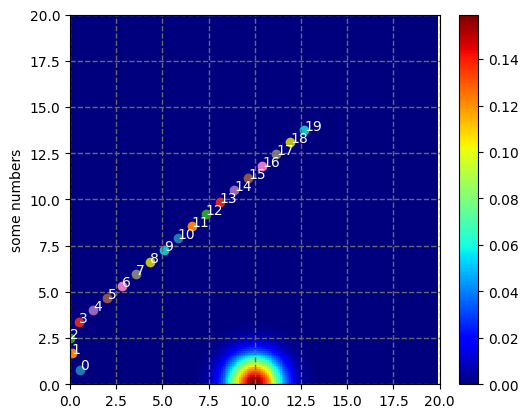

In [14]:
G = gauss_function_2d([Xg, Yg], x0, y0, sigx, sigy)
# G = np.zeros_like(G)
fig = figure()
ax = fig.add_subplot(1,1,1)
box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
im = ax.imshow(G, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# ax.scatter(x0, y0, marker='x', color='silver', s=50)
ax.grid(color='dimgrey', linestyle='--', linewidth=1)
plt.ylabel('some numbers')
plt.axis([0, FOV_range*2, 0, FOV_range*2])
for i in range(0, len(res.x), 2):
    plt.scatter(res.x[i], res.x[i+1])
    ax.annotate(int(i/2), (res.x[i], res.x[i+1]), color='w')
plt.show()